# Métodos Numéricos 2024

## Guía 3: 2024-04-23 - Interpolación y aproximación polinomial

In [6]:
using Plots
using LaTeXStrings

### Problema 1

1. Usando los puntos interpolantes $x_0 = 0$, $x_1=0.6$ y $x_2=0.9$, construya analíticamente los polinomios interpolantes de Lagrange de grado 1 y 2 que aproximen las funciones
  
    **a.** $f(x) = \ln (x+1)$
    
    **b.** $g(x) = \sqrt{x+1}$ 
    
    en $x=0.45$.

2. Encuentre los errores absolutos y relativos correspondientes.

3. En el rango dado $[x_0,x_2]$, grafique ambas funciones, sus polinomios interpolantes y correspondientes aproximaciones de Taylor de grado 2 entorno a $x_0$. Agregue al gráfico los puntos interpolantes $(x_i,f(x_i))$ (o $(x_i,g(x_i))$ según corresponda) usando símbolos en vez de curvas.

**Rta 1.1**

El polinomio interpolante de Lagrange sobre los puntos $(x_0,y_0)),...,(x_n,y_n))$ es
$$
P_n(x) = \sum_{i=0}^n y_iL_i(x)
$$
donde
$$
L_i(x) = \prod_{j=0,j\neq i}^n \frac{x-x_j}{x_i-x_j} = \frac{x-x_0}{x_i-x_0}...\frac{x-x_{i-1}}{x_i-x_{i-1}}\frac{x-x_{i+1}}{x_i-x_{i+1}}...\frac{x-x_n}{x_i-x_n}
$$
Luego,

In [104]:
function L(x,puntos)
    L = ones(length(puntos))
    
    for i in 1:length(puntos)
        for j in 1:length(puntos) 
            if j != i
                L[i] *= (x-puntos[j])/(puntos[i]-puntos[j])
            end
        end
    end
    return L
end
function y(f,puntos)
    w = f.(puntos)
    return w
end
    
function Lagrange(f,x,puntos)
    Pn = 0
    Ln = L(x,puntos)
    w = y(f,puntos)
    
    for k in 1:length(puntos)
        Pn += w[k]*Ln[k]
    end
    return Pn
end



Lagrange (generic function with 1 method)

In [ ]:
function log_Taylor(x, n)
    taylor = 0
    for i in 1:n
        taylor += (((-1)^(i+1))*x^i)/(i)
    end
    return taylor
end

In [112]:
function errores(f,x,puntos)
    c = abs(Lagrange(f,x,puntos)-f(x))
    r = abs(c/f(x))
    return c,r
end


log_Taylor (generic function with 1 method)

In [113]:
puntos = [0,0.6,0.9]
L(0.45,puntos)

3-element Vector{Float64}:
  0.12499999999999997
  1.1249999999999998
 -0.24999999999999992

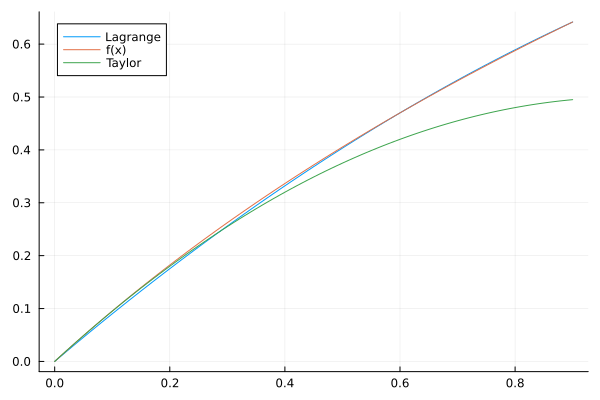

In [123]:

f(x)= log(x+1)
x = 0.45

g(y) = Lagrange2(f,y,puntos)
h(y) = log_Taylor(y,2)
plot(0:0.01:0.9,g,label = "Lagrange")
plot!(0:0.01:0.9,f,label = "f(x)")
plot!(0:0.01:0.9,h, label = "Taylor")

In [124]:
errores(f,x,puntos)


(0.0032729450741291743, 0.008808573977367187)

### Problema 2

1. Escriba una función que evalúe el **polinomio interpolante de Lagrange** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada: 

    1. el valor $x$, 
    2. un vector de valores $x_i$, 
    3. un vector  de valores $y_i$, y debe retornal el valor $P(x)$.

2. Para cada caso del **Problema 1**, realice un gráfico de $P(x)$ vs $x$ con una línea sólida generada con $N=200$ puntos equidistantes en el intérvalo $[x_0,x_n]$. Agrege a cada  gráfico la función interpolada utilizando una línea punteada sobre los mismos puntos, y los puntos de interpolación utilizando símbolos. **Ayuda:** no confundir los $N$ puntos usados para graficar las curvas, con los $n$ puntos interpolación $(x_i,y_i) = (x_i,f(x_i))$ con $i=0,1,2$ provistos en el **Problema 1**.

3. En otras figuras, gráfique la diferencia entre los polinomios y las funciones interpoladas.

In [ ]:
#Literalmente es lo que hice en  1

### Problema 3

Construya analíticamente el polinomio interpolante de Newton para las siguientes funciones. 
De una cota del error absoluto en el intervalo $[x_0,x_n]$.

1. La función
     $$f(x) = \exp (2x) \cos(3x)$$
   para $x_0=0$, $x_1=0.3$ y $x_2=0.6$.

2. La función 
    $$g(x) = \ln(x)$$
   para $x_0=1$, $x_1=1.1$, $x_2=1.3$ y $x_3=1.4$.

In [75]:
x = [0,0.3,0.6,1]
f(x) = exp(2*x)*cos(3*x)
w = f.(x)
f1 = w[1]
f12 = (w[1]-w[2])/(x[1]-x[2])
f23 = (w[2]-w[3])/(x[2]-x[3])
f34 = (w[3]-w[4])/(x[3]-x[4])

f123 = (f12-f23)/(x[1]-x[3])
f234 = (f23-f34)/(x[2]-x[4])

f1234 = (f123-f234)/(x[1]-x[4])

w = [f1,f12,f123,f1234]

4-element Vector{Float64}:
   1.0
   0.4421573656537518
 -11.220177438133113
  -3.225511620934551

### Problema 4

1. Escriba una función que evalúe el **polinomio interpolante de Netwon** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada:
    1. el valor $x$, 
    2. un arreglo $v$ de valores $x_i$,
    3. un arreglo $w$ de valores $y_i$, y debe retornal el valor $P(x)$.

2. Grafique los polinomios interpolantes de Newton para las funciones del **problema 4** en $N=200$ puntos equidistantes en el intervalo $[x_0,x_n]$ correspondiente. Incluya en el grafico las curvas de las funciones y, con símbolos, los puntos de interpolación.

3. Repita los incisos 1. y 2. pero usando puntos de interpolación determinados por $n=80$ valores equidistantes de $x_i$ en $[0,0.6]$ para $f$ y en $[1,1.4]$ para $g$.

4. Repita el inciso 3. pero usando `BigFloat` en vez de `Float64`.

5. Interprete lo observado.

In [39]:
function cof(vecf,v)
    n = length(v)
    z = deepcopy(vecf)
    for i in 1:n
        l = i
        for k in n:-1:l+1
            z[k]= (z[k]-z[k-1])/(v[k]-(v[(k)-(l)]))
        end
    end
    return z
end
        

cof (generic function with 1 method)

In [43]:
v = [0,0.3,0.6]
f(x) = exp(2*x)*cos(3*x)
vect_f = f.(v)


3-element Vector{Float64}:
  1.0
  1.1326472096961255
 -0.7543375194717092

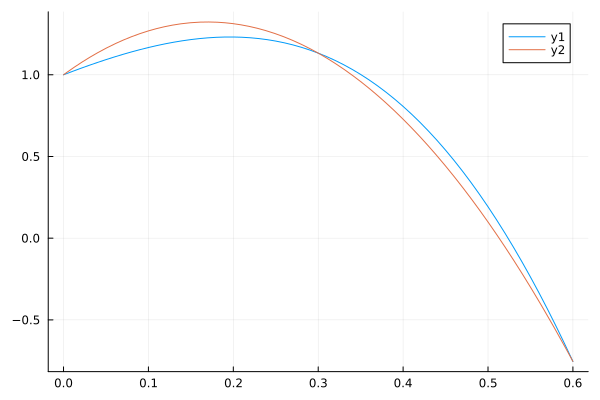

In [45]:
function pol(vecf,x,v)
    xi = cof(vecf,v)
    n = length(v)
    p = 0
    for i in n:-1:2
        p = (p+xi[i])*(x-v[i-1])
    end 
    return p + xi[1]
end

p(x) = pol(vect_f,x,v)

plot(0:0.01:0.6,f)
plot!(p)

### Problema 5 

#### Error  de la interpolación polinomial para puntos equiespaciados

Usando el teorema dado en el teórico, demuestre el siguiente corolario.

**Corolario:** Sea $f \in C_{[a,b]}^{(n+1)}$  tal que $\exists M>0 / |f^{(n+1)}(x) |< M \;\forall \,x\in [a,b]$ (i.e. su $n+1$-ésima derivada es acotada en $[a,b]$). Sea $x_i=a + ih \;; i=0,\cdots,n$ donde $ h=(b-a)/n$. Sea $P_n$ es el polinomio de grado $n$ interpolante a $f$ en los puntos $x_i$ (i.e. $P_n(x_i)=f(x_i)\;,i=0,\cdots ,n$). Entonces, $\forall\;x\in [a,b]$ se tiene
$$
\left| f(x) - P_n(x)\right | \leq \frac{M}{4 (n+1)}\;\left(\frac{b-a}{n}\right)^{n+1}
$$

ia lo boi a azer lol

### Problema 6

Se desea aproximar $\cos(x)$ en el intervalo $[0,1]$ con un error absoluto menor a $1\times 10^{-7}$ para todo $x \in [0,1]$. 

1. Usando el teorema del error de la interpolación polinomial, estime el número $n$ de puntos de interpolación que son necesarios para conseguir el máximo error absoluto mencionado.

2. Grafique el error absoluto en el intervalo en cuestión para tres casos particulares de $\{x_i\}$: 
    1. puntos equidistantes $x_i=i/n$, 
    2. $n$ puntos distribuidos al azar en el intervalo $[0,1]$, y 
    3. puntos distribuidos heterogéneamente según la fórmula $x_i=1/i$ para $i=1,2,...,n$.

## Ejercicios Complementarios

### Problema C.1

Considere la función definida por $f(x) = \frac{1}{1 + 25 x^2}$.

1. Grafique la función $f$ en el intervalo $[-1,1]$.

Luego, para cada valor de $n\in \{5, 10, 20\}$:

2. Calcule la interpolación de $f$ por el **método de Lagrange** usando $n+1$ valores equidistantes de $x$ en el intervalo mencionado.

3. Añada al gráfico una curva del polinomio interpolante evaluandolo en 200 puntos equidistantes en los rangos $x=[-1,1]$ e $y=[-1.5,1.5]$.

4. Calcule el error máximo para cada caso e incluya estos datos de errores máximos en el gráfico.

**Nota:** En este problema se observa el llamado *fenómeno de Runge*, en el que la interpolación por polinomios usando puntos equiespaciados da resultados divergentes.

5. ¿Por qué no hay contradicción con el teorema de aproximación de Weierstrass?

6. En vez de puntos equiespaciados, pruebe usando el espaciamiento de Chebyshev dado por $x_i = -\cos(\pi (i-1)/n)$, para $i=1,2,...,n+1$. ¿Disminuye significativamente el error en este caso?

### Problema C.2

Considere el siguiente polinomio:
$$
p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5 \ ,
$$

1. Grafíquelo y observe que posee una única raíz real positiva.

2. Calcule a mano su derivada y grafíquela.

3. Evalúe el polinomio y su derivada utilizando el algoritmo de Horner de la guía 2. Grafique nuevamente comparando con lo graficado en los incisos 2. y 3. para verificar que dan lo mismo.

4. Encuentre la raíz del polinomo utilizando el método de Newton-Raphson. Para ello, elija el valor inicial $p_1$ sacando ventaja de los teoremas que acotan la región del espacio complejo donde se encuentran las raíces.